# Ensemble Learning

It combines multiple models to enchance the overall performance of ML Algorithms. The fundamental principal of Ensambling is to combining the predictions of mmutiple models to produce more accurate and robust prediction than any single model.

For Classification problem we take the majority of all models(max voting), for regression we use averaging of the predictions from all models

#### Categories
- Sequential Ensembling Technique:
  - This technique trains the model sequentially, with eaach model attempting to correct predecessor's error. An example of this approach is Boosting Algorithms.
  - Steps:
    - Base Model Selection
    - Sequential Training
    - Error Correction
    - Prediction Refinement
    - Combine the Predictions
    - Evaluate

- Parallel Ensembling Technique:
  - It concurrently trains the models. Example would be bagging Algorithm and Random Forest.
  - Steps:
    - Data Partitioning
    - Model Training
    - Predicition
    - Combining Predictions
    - Evaluation

Voting is two types:
- Hard Voting
- Soft Voting

In [1]:
# Implementing Hard and Soft Voting

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.ensemble import VotingClassifier

In [3]:
# Read the data

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data", header = None)

data.columns = ['Sample code', 'Clump Thickness','Uniformity of Cell Size',
                'Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size',
                'Bare Nuclei','Bland Chromantin','Normal Nucleoli','Mitoses','Class']

In [4]:
data.head()


,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromantin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
data.shape

(699, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code                  699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromantin             699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [7]:
data.describe()

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromantin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [8]:
data['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [9]:
data.isnull().sum()

Sample code                    0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromantin               0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [10]:
data = data.drop(columns = ['Sample code'])
data['Bare Nuclei'] = data['Bare Nuclei'].replace('?',0).astype(int)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              699 non-null    int64
 1   Uniformity of Cell Size      699 non-null    int64
 2   Uniformity of Cell Shape     699 non-null    int64
 3   Marginal Adhesion            699 non-null    int64
 4   Single Epithelial Cell Size  699 non-null    int64
 5   Bare Nuclei                  699 non-null    int64
 6   Bland Chromantin             699 non-null    int64
 7   Normal Nucleoli              699 non-null    int64
 8   Mitoses                      699 non-null    int64
 9   Class                        699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


In [12]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [13]:
imputer = SimpleImputer(strategy = 'median')
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)

scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train_imp)
X_test_sc = scaler.transform(X_test_imp)

In [14]:
# Initialize the Base Models

estimators = [
    ('logistic', LogisticRegression()),
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability = True))
]

In [15]:
# Use Voting Classifiers to create Ensemble of estimators (HArd Voting)

ensemble = VotingClassifier(estimators, voting = 'hard')

In [16]:
kf = KFold(n_splits = 10, shuffle = True, random_state = 7)
results = cross_val_score(ensemble, X_train_sc, y_train, cv = kf)

In [17]:
print(f'Mean Cross validation accuracy of the ensemble model is {results.mean():.5f}')

Mean Cross validation accuracy of the ensemble model is 0.96247


In [18]:
ensemble.fit(X_train_sc, y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('svm', SVC(probability=True))])

In [19]:
test_accuracy = ensemble.score(X_test_sc, y_test)
train_accuracy = ensemble.score(X_train_sc, y_train)

In [20]:
print(f'Ensemble model Accuracy on Test Set {test_accuracy:.5f}')
print(f'Ensemble model Accuracy on Train Set {train_accuracy:.5f}')

Ensemble model Accuracy on Test Set 0.96429
Ensemble model Accuracy on Train Set 0.98032


In [21]:
lr = LogisticRegression()
lr.fit(X_train_sc, y_train)
print("Test" , lr.score(X_test_sc, y_test))
print("Train", lr.score(X_train_sc, y_train))

Test 0.9571428571428572
Train 0.9677996422182469


In [22]:
dt = DecisionTreeClassifier()
dt.fit(X_train_sc, y_train)
print("Test" , dt.score(X_test_sc, y_test))
print("Train", dt.score(X_train_sc, y_train))

Test 0.9571428571428572
Train 1.0


In [23]:
supp = SVC()
supp.fit(X_train_sc, y_train)
print("Test" , supp.score(X_test_sc, y_test))
print("Train", supp.score(X_train_sc, y_train))

Test 0.9642857142857143
Train 0.9749552772808586


In [24]:
# Soft Voting
# Use Voting Classifiers to create Ensemble of estimators

ensemble2 = VotingClassifier(estimators, voting = 'soft')
kf = KFold(n_splits = 10, shuffle = True, random_state = 7)
results = cross_val_score(ensemble2, X_train_sc, y_train, cv = kf)

print(f'Mean Cross validation accuracy of the ensemble model is {results.mean():.5f}')

ensemble2.fit(X_train_sc, y_train)
test_accuracy = ensemble2.score(X_test_sc, y_test)
train_accuracy = ensemble2.score(X_train_sc, y_train)
print(f'Ensemble model Accuracy on Test Set {test_accuracy:.5f}')
print(f'Ensemble model Accuracy on Train Set {train_accuracy:.5f}')


Mean Cross validation accuracy of the ensemble model is 0.95883
Ensemble model Accuracy on Test Set 0.96429
Ensemble model Accuracy on Train Set 0.98569


In [25]:
y_pred_hard = ensemble.predict(X_test_sc)
y_pred_soft = ensemble2.predict(X_test_sc)

Classification Report - HArd Voting
------------------------------------------------------
              precision    recall  f1-score   support

           2       0.98      0.97      0.97        91
           4       0.94      0.96      0.95        49

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



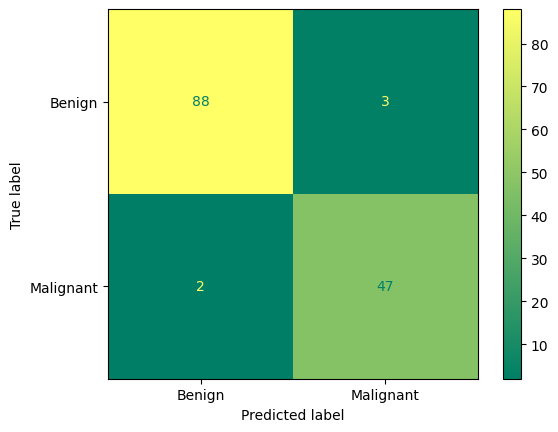

In [26]:
print("Classification Report - HArd Voting")
print("------------------------------------------------------")
print(classification_report(y_test, y_pred_hard))
cm = confusion_matrix(y_test, y_pred_hard)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Benign','Malignant'])
disp.plot(cmap = 'summer')
plt.show()

Classification Report - Soft Voting
------------------------------------------------------
              precision    recall  f1-score   support

           2       0.98      0.97      0.97        91
           4       0.94      0.96      0.95        49

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



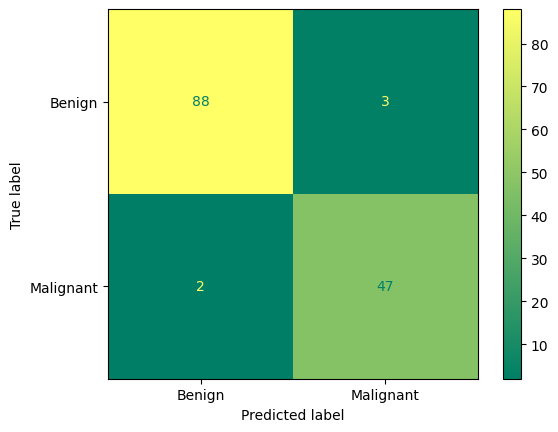

In [27]:
print("Classification Report - Soft Voting")
print("------------------------------------------------------")
print(classification_report(y_test, y_pred_soft))
cm = confusion_matrix(y_test, y_pred_soft)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Benign','Malignant'])
disp.plot(cmap = 'summer')
plt.show()

### AdaBoost

In [28]:
# Implement AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

In [29]:
# Use Voting classifier to create ensemble of estimators
model = AdaBoostClassifier(algorithm = 'SAMME')
kf = KFold(n_splits = 10, shuffle = True, random_state = 7)
results = cross_val_score(model, X_train, y_train, cv = kf, scoring = 'accuracy')
print(f'Mean Cross Validation accuracy of the AdaBoost model is {results.mean():.3f}')
model.fit(X_train, y_train)
test_accuracy = model.score(X_test_sc, y_test)
train_accuracy = model.score(X_train_sc, y_train)
print(f'Ensemble model Accuracy on test set {test_accuracy:.3f}')
print(f'Ensemble model Accuracy on train set {train_accuracy:.3f}')

Mean Cross Validation accuracy of the AdaBoost model is 0.955
Ensemble model Accuracy on test set 0.650
Ensemble model Accuracy on train set 0.657


C:\Users\0litt\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\0litt\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [30]:
model.fit(X_train_sc, y_train)
y_pred_test = model.predict(X_test_sc)

Clasification Report
-------------------------------
              precision    recall  f1-score   support

           2       0.95      0.98      0.96        91
           4       0.96      0.90      0.93        49

    accuracy                           0.95       140
   macro avg       0.95      0.94      0.94       140
weighted avg       0.95      0.95      0.95       140



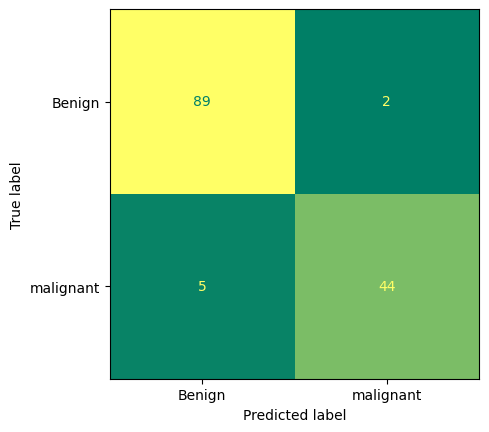

In [31]:
print(f'Clasification Report')
print('-------------------------------')
print(classification_report (y_test, y_pred_test))

cm = confusion_matrix(y_test, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Benign', 'malignant'])
disp.plot(colorbar = False, cmap = 'summer')
plt.show()

### Gradiend Boosting Algorithm

In [32]:
# Applying Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
kf = KFold(n_splits = 10, shuffle = True, random_state =9 )
results = cross_val_score(model, X_train, y_train, cv = kf, scoring = 'accuracy')
print(f'Mean Cross Validation accuracy of the AdaBoost model is {results.mean():.3f}')
model.fit(X_train, y_train)
test_accuracy = model.score(X_test_sc, y_test)
train_accuracy = model.score(X_train_sc, y_train)
print(f'Ensemble model Accuracy on test set {test_accuracy:.3f}')
print(f'Ensemble model Accuracy on train set {train_accuracy:.3f}')

Mean Cross Validation accuracy of the AdaBoost model is 0.964
Ensemble model Accuracy on test set 0.650
Ensemble model Accuracy on train set 0.657


C:\Users\0litt\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\0litt\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Clasification Report
-------------------------------
              precision    recall  f1-score   support

           2       0.97      0.97      0.97        91
           4       0.94      0.94      0.94        49

    accuracy                           0.96       140
   macro avg       0.95      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140



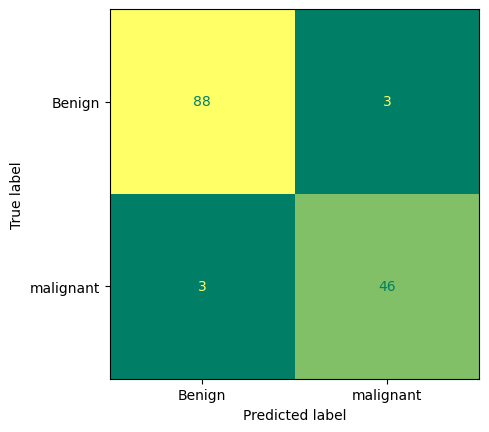

In [33]:
model.fit(X_train_sc, y_train)
y_pred_test = model.predict(X_test_sc)

print(f'Clasification Report')
print('-------------------------------')
print(classification_report (y_test, y_pred_test))

cm = confusion_matrix(y_test, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Benign', 'malignant'])
disp.plot(colorbar = False, cmap = 'summer')
plt.show()

### XGBOOST  - eXtream Gradient Boosting

In [34]:
!pip install xgboost

  Using cached xgboost-2.1.2-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 187.9 kB/s eta 0:11:05
   ---------------------------------------- 0.0/124.9 MB 196.9 kB/s eta 0:10:35
   ---------------------------------------- 0.1/124.9 MB 374.1 kB/s eta 0:05:34
   ---------------------------------------- 0.2/124.9 MB 538.9 kB/s eta 0:03:52
   ---------------------------------------- 0.2/124.9 MB 625.1 kB/s eta 0:03:20
   ---------------------------------------- 0.3/124.9 MB 791.9 kB/s eta 0:02:38
   ---------------------------------------- 0.3/124.9 MB 756.6 kB/s eta 0:02:45
   ---------------------------------------- 0.3/124.9 MB 756.6 kB/s eta 0:02:45
   ---


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Mean cross Validation accuracy of the XGB model is 0.953
Ensemble model Accuracy on test set 0.950
Ensemble model Accuracy on train set 1.000
Clasification Report
-------------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        91
           1       0.94      0.92      0.93        49

    accuracy                           0.95       140
   macro avg       0.95      0.94      0.94       140
weighted avg       0.95      0.95      0.95       140



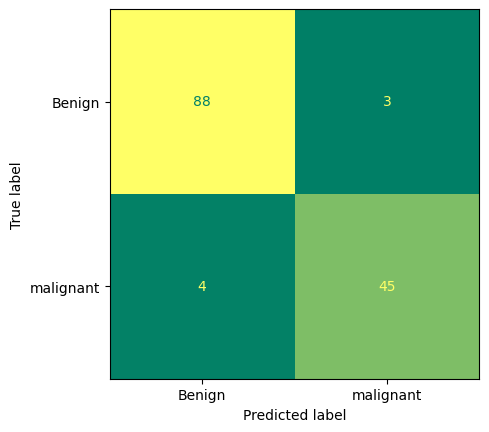

In [43]:
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder

# Label encode the target variable for both train and Test

le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)

# implement XGBoost Classifier
model = XGBClassifier()
kf =KFold(n_splits = 10, shuffle = True, random_state = 7)
results = cross_val_score(model, X_train_sc, y_train_le, cv = kf, scoring = 'accuracy')

print(f'Mean cross Validation accuracy of the XGB model is {results.mean():.3f}')

model.fit(X_train_sc, y_train_le)
test_accuracy = model.score(X_test_sc, y_test_le)
train_accuracy = model.score(X_train_sc, y_train_le)

print(f'Ensemble model Accuracy on test set {test_accuracy:.3f}')
print(f'Ensemble model Accuracy on train set {train_accuracy:.3f}')

model.fit(X_train_sc, y_train_le)
y_pred_test_le = model.predict(X_test_sc)

print(f'Clasification Report')
print('-------------------------------')
print(classification_report (y_test_le, y_pred_test_le))

cm = confusion_matrix(y_test_le, y_pred_test_le)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Benign', 'malignant'])
disp.plot(colorbar = False, cmap = 'summer')
plt.show()

### CatBoost

In [42]:
!pip install catboost

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     --------------------------------- ------ 51.2/61.0 kB ? eta -:--:--
     ---------------------------------------- 61.0/61.0 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/101.7 MB 2.6 MB/s eta 0:00:39
   ---------------------------------------- 0.1/101.7 MB 1.4 MB/s eta 0:01:11
   ---------------------------------------- 0.2/101.7 MB 2.0 MB/s eta 0:00:52
   -----------------------------------

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
from catboost import CatBoostClassifier

from sklearn.preprocessing import LabelEncoder

# Label encode the target variable for both train and Test

le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)

# implement CAtBoost Classifier
model = CatBoostClassifier(verbose = 0)
kf = KFold(n_splits = 10, shuffle = True, random_state = 7)
results = cross_val_score(model, X_train_sc, y_train_le, cv = kf, scoring = 'accuracy')

print(f'Mean cross Validation accuracy of the CatBoost model is {results.mean():.3f}')

model.fit(X_train_sc, y_train_le)
test_accuracy = model.score(X_test_sc, y_test_le)
train_accuracy = model.score(X_train_sc, y_train_le)

print(f'Ensemble model Accuracy on test set {test_accuracy:.3f}')
print(f'Ensemble model Accuracy on train set {train_accuracy:.3f}')

model.fit(X_train_sc, y_train_le)
y_pred_test_le = model.predict(X_test_sc)

print(f'Clasification Report')
print('-------------------------------')
print(classification_report (y_test_le, y_pred_test_le))

cm = confusion_matrix(y_test_le, y_pred_test_le)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Benign', 'malignant'])
disp.plot(colorbar = False, cmap = 'summer')
plt.show()

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

## Stacking

In [1]:
!pip install vecstack

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19873 sha256=1a13f625b75f3d8f985763e30cd1e6cfda8700630210be492c61bd7fc9c6bab5
  Stored in directory: c:\users\0litt\appdata\local\pip\cache\wheels\60\62\ce\d16e9d9fb8303d3d80c6b7f536fb90a016a06dd5941df63ae7
Successfully built vecstack


In [32]:
# Import libraries

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from vecstack import stacking
from sklearn.pipeline import Pipeline

In [9]:
# Define the URL of the dataset
link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

# Define column names for the dataset
names = ['Class', 'Alcohol', 'Malic acid', 'Ash',
         'Alkalinity of ash', 'Magnesium', 'Total phenols',
         'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
         'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
         'Proline']

In [10]:
df = pd.read_csv(link, header = None, names = names)
df.head()

,Class,Alcohol,Malic acid,Ash,Alkalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [13]:
le = LabelEncoder()

y = le.fit_transform(y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 25)

In [21]:
# Base Models

models = [
         KNeighborsClassifier(n_neighbors = 5),
         RandomForestClassifier(),
         XGBClassifier()
         ]

# Define Meta Model

meta_model = LogisticRegression()

In [17]:
# Perform Stacking

S_train, S_test = stacking(models, X_train, y_train, X_test, regression = False, metric = accuracy_score,
                          n_folds = 5, stratified = True, shuffle = True, random_state = 25, verbose = 2)

task:         [classification]
n_classes:    [3]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.77419355]
    fold  1:  [0.46666667]
    fold  2:  [0.56666667]
    fold  3:  [0.70000000]
    fold  4:  [0.80000000]
    ----
    MEAN:     [0.66150538] + [0.12674204]
    FULL:     [0.66225166]

model  1:     [RandomForestClassifier]
    fold  0:  [1.00000000]
    fold  1:  [0.96666667]
    fold  2:  [1.00000000]
    fold  3:  [0.93333333]
    fold  4:  [1.00000000]
    ----
    MEAN:     [0.98000000] + [0.02666667]
    FULL:     [0.98013245]

model  2:     [XGBClassifier]
    fold  0:  [0.96774194]
    fold  1:  [0.96666667]
    fold  2:  [1.00000000]
    fold  3:  [0.93333333]
    fold  4:  [1.00000000]
    ----
    MEAN:     [0.97354839] + [0.02489056]
    FULL:     [0.97350993]



In [18]:
S_train.shape

(151, 3)

In [19]:
S_test.shape

(27, 3)

In [22]:
meta_model.fit(S_train, y_train)

LogisticRegression()

In [23]:
y_pred_test = meta_model.predict(S_test)

In [29]:
acc_train = accuracy_score(y_train, meta_model.predict(S_train))
accuracy = accuracy_score (y_test, y_pred_test)

print(f'Accuracy Score for Stacking Ensemble on Test Data {accuracy}')
print(f'Accuracy Score for Stacking Ensemble  on Train Data {acc_train:.4f}')

Accuracy Score for Stacking Ensemble on Test Data 1.0
Accuracy Score for Stacking Ensemble  on Train Data 0.9801


In [54]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[ 9,  0,  0],
       [ 0, 12,  0],
       [ 0,  0,  6]], dtype=int64)

In [55]:
confusion_matrix(y_train, meta_model.predict(S_train))


array([[50,  0,  0],
       [ 1, 56,  2],
       [ 0,  0, 42]], dtype=int64)

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_train, meta_model.predict(S_train)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.95      0.97        59
           2       0.95      1.00      0.98        42

    accuracy                           0.98       151
   macro avg       0.98      0.98      0.98       151
weighted avg       0.98      0.98      0.98       151



In [57]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

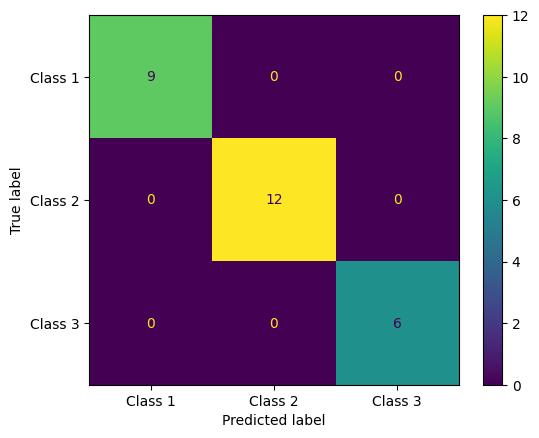

In [58]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Class 1', 'Class 2', 'Class 3'])
disp.plot()
plt.show()